<a href="https://colab.research.google.com/github/21PA1A6132/3-2_DL_LAB/blob/main/Experiment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import required Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#Read the image file

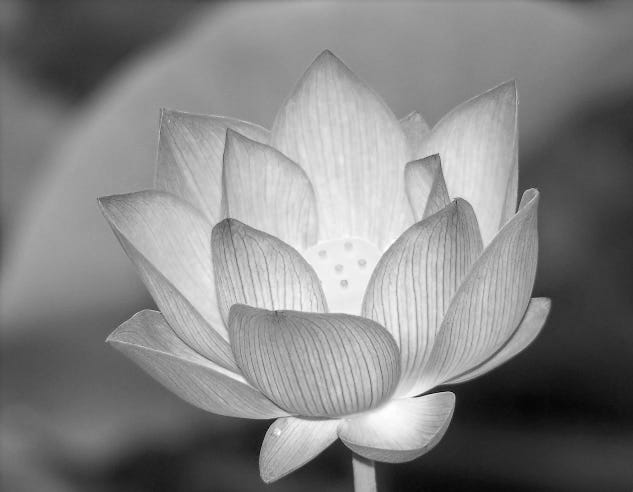

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# read a image using imread
image= cv2.imread('/content/flower.jpg')
img = cv2.imread('/content/flower.jpg',0)
cv2_imshow(img)

#Histogram equalisation

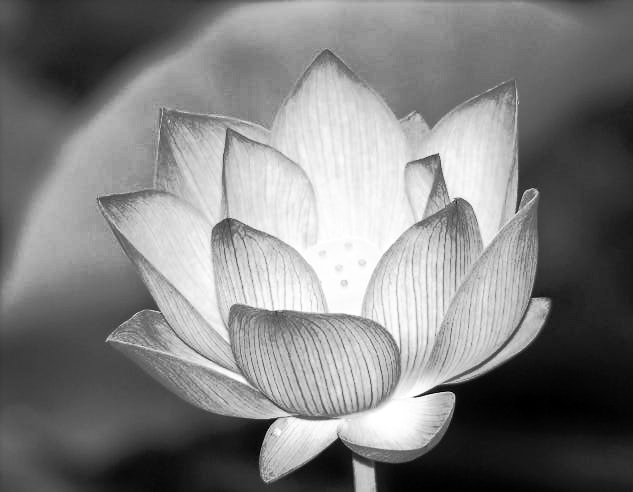

In [6]:
equ = cv2.equalizeHist(img)
cv2_imshow(equ)

#Thresholidng


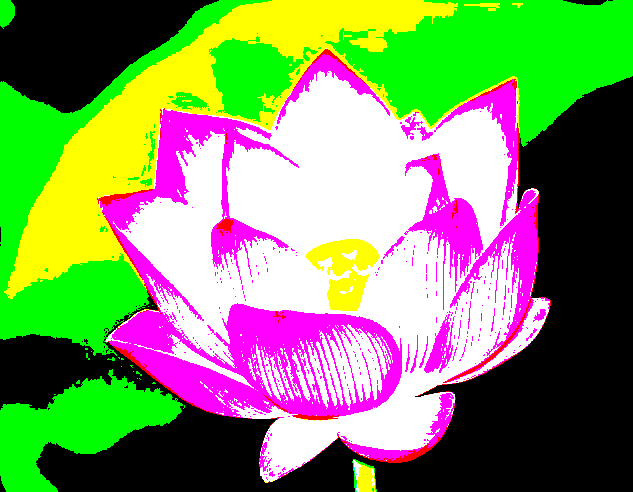

In [8]:
threshold_value = 120
max_val = 255
ret,image = cv2.threshold(image,threshold_value,max_val,cv2.THRESH_BINARY)
cv2_imshow(image)


#Edge Detection

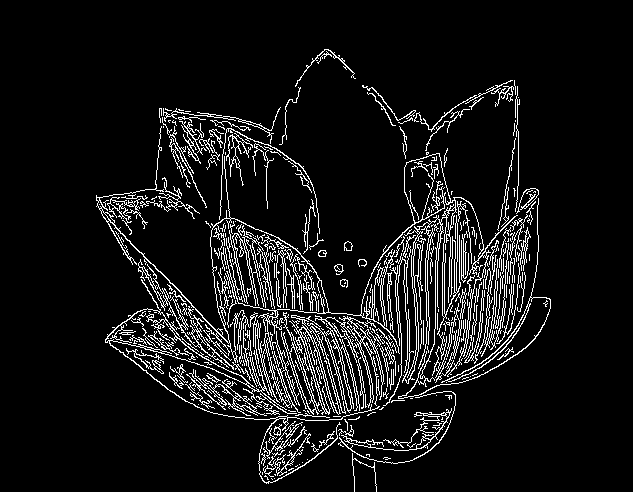

In [7]:
edges = cv2.Canny(img, threshold1=30, threshold2=100)
cv2_imshow(edges)

#Data Augmentation

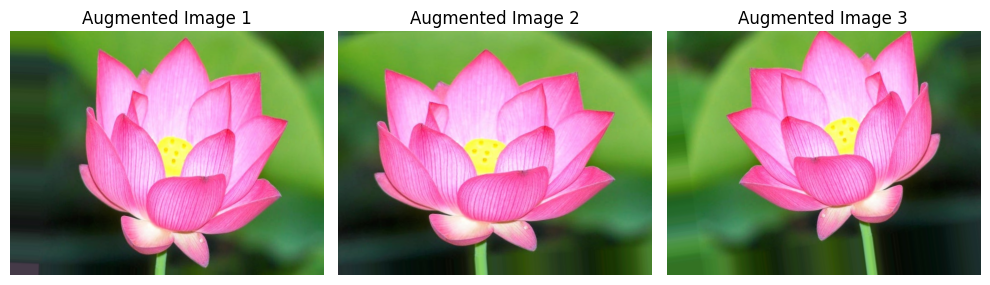

In [9]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

# Load the image
original_img = cv2.imread('/content/flower.jpg')
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Reshape image to add batch dimension
image = np.expand_dims(original_img, axis=0)

# Create ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
)

# Fit the generator on the image
datagen.fit(image)

# Generate augmented images
augmented_images = []
for batch in datagen.flow(image, batch_size=1):
    augmented_images.append(batch[0].astype('uint8'))
    if len(augmented_images) >= 3:  # Generate 3 augmented images
        break

# Display augmented images
plt.figure(figsize=(10, 5))
for i, augmented_image in enumerate(augmented_images):
    plt.subplot(1, 3, i+1)
    plt.imshow(augmented_image)
    plt.title(f'Augmented Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()
